In [45]:
%matplotlib inline

In [46]:
from pylab import*
import numpy as np

In [47]:
import sys
sys.path.append('\CVFIT')

In [48]:
from cvfit import fitting
from cvfit.fitting import SingleFitSession
from cvfit.fitting import MultipleFitSession

In [49]:
sets, fname = fitting.load_data(example=True)
print('File {0} loaded'.format(fname))
print('{0:d} sets found.'.format(len(sets)))
sets = fitting.set_weights(sets)
for i in range(len(sets)):
    print ('\nSet #{0:d}:'.format(i+1))
    print (sets[i])

File \CVFIT./Example/Example.xlsx loaded
5 sets found.

Please select the weighting method now:
1: Weights constant; errors from residuals (Default).
2, 3: s(Y) or n are not specified for some or all pints. Weights cannot by specified from s(Y) or n.
4: s(Y) cannot be calculated because some or all X have only one repeat. Weights cannot by specified from s(Y).
5: Arbitrary weights entered by hand now (NOT IMPLEMENTED YET).
Mode number [1]: 

Set #1:

X	Y	s(Y)	weight
30	54	0	1
100	538	0	1
300	2745	0	1
1000	6493	0	1
3000	8450	0	1
3000	9793	0	1
3000	9647	0	1
3000	10023	0	1
3000	9025	0	1
3000	9341	0	1
10000	10349	0	1
10000	10467	0	1
30000	11527	0	1
30000	10946	0	1


Set #2:

X	Y	s(Y)	weight
30	91	0	1
100	645	0	1
300	2460	0	1
600	3592	0	1
1000	4369	0	1
1000	4598	0	1
1000	4752	0	1
1000	4724	0	1
1000	4412	0	1
3000	6430	0	1
10000	7227	0	1
30000	7970	0	1
30000	7976	0	1


Set #3:

X	Y	s(Y)	weight
100	1731	0	1
300	7829	0	1
600	11922	0	1
1000	14397	0	1
3000	16500	0	1
3000	17804	0	1
3000	18528	0	1


In [50]:
eqname = 'Hill'
from cvfit.equations import Hill

# Example of single fit session.

In [51]:
eq = Hill(eqname)
fs = SingleFitSession(sets[0], eq)


	Fitting session for Set 1 initialised!

In [53]:
fs.fit()


 Restarted at result of local search minimum

 Restarted at averaged vertices

 Restarted at result of local search minimum

 Restarted at result of local search minimum

 Returned with result of local search minimum


In [54]:
fs.calculate_errors()
print(fs.string_estimates())
print(fs.string_liklimits())

Number of point fitted = 14
Number of parameters estimated = 3
Degrees of freedom = 11
Residual error SD = 446.029      (variance = 198941.810)
Parameter 1: Ymin  	= 0  	  (fixed)
Parameter 2: Ymax  	= 11124.1  	  Approx SD = 297.241	  CV = 2.7
Parameter 3: EC50  	= 773.58  	  Approx SD = 80.5618	  CV = 10.4
Parameter 4: nH    	= 1.23848  	  Approx SD = 0.118585	  CV = 9.6
Minimum SSD = 2188359.915; 
Max log-likelihood = -103.938
Correlation matrix = [!!!! PRINTOUT OF CORRELATION MATRIX NOT IMPLEMENTED YET. SORRY.


LIKELIHOOD INTERVALS
2.42-unit Likelihood Intervals  (equivalent SD for Gaussian- 2.2)
Lmax= -103.938;   Lcrit= -106.36
Parameter 1:   Ymin	= 0	  (fixed)
Parameter 2:   Ymax	= 11124.1	  LOWER = 10528.6	  UPPER = 11807.7
Parameter 3:   EC50	= 773.58	  LOWER = 614.965	  UPPER = 958.862
Parameter 4:   nH  	= 1.23848	  LOWER = 1.01316	  UPPER = 1.5316


# Example of multiple fit session

In [42]:
fits = MultipleFitSession()
for dataset in sets:
    eq = Hill(eqname)
    fs = SingleFitSession(dataset, eq)
    fits.add(fs)


	Fitting session for Set 1 initialised!
	Fitting session for Set 2 initialised!
	Fitting session for Set 3 initialised!
	Fitting session for Set 4 initialised!
	Fitting session for Set 5 initialised!

In [43]:
for fs in fits.list:
    print("\n\tSTART FITTING ===============")
    fs.fit()
    fs.calculate_errors()
    print(fs.string_estimates())
    print(fs.string_liklimits())
    print("\n\tFITTING FINISHED ============")
print ("\nFINISHED FITTING ALL SETS")
    


	START FITTING ===============

 Restarted at result of local search minimum

 Restarted at averaged vertices

 Restarted at result of local search minimum

 Restarted at result of local search minimum

 Returned with result of local search minimum
Number of point fitted = 14
Number of parameters estimated = 3
Degrees of freedom = 11
Residual error SD = 446.029      (variance = 198941.810)
Parameter 1: Ymin  	= 0  	  (fixed)
Parameter 2: Ymax  	= 11124.1  	  Approx SD = 297.241	  CV = 2.7
Parameter 3: EC50  	= 773.58  	  Approx SD = 80.5618	  CV = 10.4
Parameter 4: nH    	= 1.23848  	  Approx SD = 0.118585	  CV = 9.6
Minimum SSD = 2188359.915; 
Max log-likelihood = -103.938
Correlation matrix = [!!!! PRINTOUT OF CORRELATION MATRIX NOT IMPLEMENTED YET. SORRY.


LIKELIHOOD INTERVALS
2.42-unit Likelihood Intervals  (equivalent SD for Gaussian- 2.2)
Lmax= -103.938;   Lcrit= -106.36
Parameter 1:   Ymin	= 0	  (fixed)
Parameter 2:   Ymax	= 11124.1	  LOWER = 10528.6	  UPPER = 11807.7
Paramete

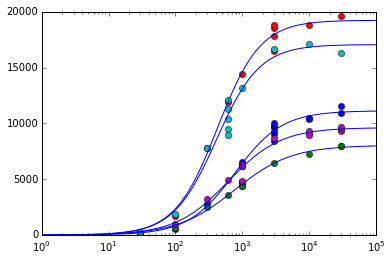

In [44]:
fplots = fits.prepare_fplot('fit')
for set in sets:
    semilogx(set.X, set.Y, 'o', label=set.title)
for fp in fplots:
    semilogx(fp[0], fp[1], 'b-')
show()